First let's map the main archetypes to the post through the topic.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
doc2topic = pd.read_csv('doc2topic.csv')[['Document', 'Topic', 'Representation', 'Representative_Docs']]
doc2topic

,Document,Topic,Representation,Representative_Docs
0,two polaroid photographs the one one the right...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...
1,kamala harris is speaking at a rally and her s...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...
2,the sharer posted a video showing her reacting...,31,"['crowd', 'video', 'billions', 'attending', 'g...",['it is a video of kamala harris coming off a ...
3,the video shows donald trump mike pence and li...,9,"['drag', 'queen', 'mike', 'pence', 'figures', ...","['mitch mcconnell as a drag queen', 'ted cruz ..."
4,aoc announcing her opinions with regards to ho...,25,"['aoc', 'video', 'joe', 'biden', 'discussing',...",['its a video of a reporter sharing an ai vide...
...,...,...,...,...
709,donald trump and elon musk are sitting talking...,0,"['elon', 'musk', 'dancing', 'are', 'and', 'don...","['elon and trump are dancing', 'it is a video ..."
710,donald trump is riding a horse with eagle wing...,20,"['horse', 'goat', 'knights', 'castle', 'riding...",['donald trump is riding a horse with eagle wi...
711,it is a picture of kamala harris shaking hands...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...
712,it is an image of barack obamas face in front ...,2,"['african', 'black', 'republican', 'hat', 'dep...",['former president donald trump with his arms ...


In [18]:
topic2archetype = pd.read_csv('narrative_topics_reind.csv')[['Topic', 'Dominant_Archetype']]
topic2archetype

,Topic,Dominant_Archetype
0,15,Scandal Fabrication
1,1,Character Caricature
2,34,Ideological Demonization
3,36,Ideological Demonization
4,26,Ideological Demonization
5,10,Ideological Demonization
6,7,Ideological Demonization
7,33,Ideological Demonization
8,17,Ideological Demonization
9,35,Scandal Fabrication


In [19]:
df_arc = doc2topic.merge(topic2archetype, on='Topic')
df_arc

,Document,Topic,Representation,Representative_Docs,Dominant_Archetype
0,two polaroid photographs the one one the right...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...,Others
1,kamala harris is speaking at a rally and her s...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...,Others
2,the sharer posted a video showing her reacting...,31,"['crowd', 'video', 'billions', 'attending', 'g...",['it is a video of kamala harris coming off a ...,Scandal Fabrication
3,the video shows donald trump mike pence and li...,9,"['drag', 'queen', 'mike', 'pence', 'figures', ...","['mitch mcconnell as a drag queen', 'ted cruz ...",Character Caricature
4,aoc announcing her opinions with regards to ho...,25,"['aoc', 'video', 'joe', 'biden', 'discussing',...",['its a video of a reporter sharing an ai vide...,Scandal Fabrication
...,...,...,...,...,...
709,donald trump and elon musk are sitting talking...,0,"['elon', 'musk', 'dancing', 'are', 'and', 'don...","['elon and trump are dancing', 'it is a video ...",Public Endorsement
710,donald trump is riding a horse with eagle wing...,20,"['horse', 'goat', 'knights', 'castle', 'riding...",['donald trump is riding a horse with eagle wi...,Character Caricature
711,it is a picture of kamala harris shaking hands...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...,Others
712,it is an image of barack obamas face in front ...,2,"['african', 'black', 'republican', 'hat', 'dep...",['former president donald trump with his arms ...,Public Endorsement


In [20]:
df_all = pd.read_csv('data-2324-no-ver.csv')
df_all

,Unnamed: 0,incident_id,report_id,date_coded,url,file,screenshot,date_posted,format,transcript,...,text_around_deepfake,harm_evidence,communication_goal,core_frame,hero,villain,plot,moral,domain,year
0,0,203,17,2024-02-12,https://twitter.com/DouglasLucas/status/171631...,Screenshot 2024-02-12 at 12.47.24 PM.png (http...,NaN,2023-10-23,image,NaN,...,AI and the end of photographic truth? Deceptiv...,political_interference,education,human_interest,Joe Biden,Putin,Putin and Biden hugging,U.S. and Russian leaders can get along,twitter.com,2023.0
1,1,186,18,2024-02-04,https://twitter.com/21WIRE/status/165300993699...,"""Patrick Henningsen on X_ _⭕️ Granted, this mu...",NaN,2023-05-01,video,"""Today is today, and yesterday was today yeste...",...,"⭕️ Granted, this must be a deep fake, but rega...",non_identifiable,"satire,entertainment,harm_reputation",human_interest,A Leader Who Sounds Smart and Capable During S...,Kamala Harris Rambling and Not Making Sense Du...,"Kamala's speech does not make sense, which lea...",Kamala Harris's credibility as VP should be qu...,twitter.com,2023.0
2,2,187,19,2024-02-05,https://www.facebook.com/reel/894486844951526,deepfake 19.html (https://v5.airtableuserconte...,NaN,2023-05-03,video,"“Today is today, and yesterday is today yester...",...,"""Our VP: 'I can only hit this bong 1 more time...",other,"satire,entertainment,harm_reputation",human_interest,Intelligent Manner. and People Expect That A C...,Online Users Believe That Harris Is A Rambler.,Kamala Harris is shown to be giving a speech t...,Kamala Harris is portrayed as being unable to ...,www.facebook.com,2023.0
3,3,188,20,2024-02-05,https://twitter.com/JebraFaushay/status/165937...,Deepfake 20.html (https://v5.airtableuserconte...,NaN,2023-05-18,video,"""Excuse me, excuse me. I need everyone in the ...",...,Is this real? I feel like it might be a deep f...,other,"satire,entertainment,harm_reputation","conflict,human_interest",His Squad To Dress In Drag. and The Freedom Fo...,Republicans Who Want To Ban Drag.,"Republicans want to ban drag, but Donald Trump...",Republicans should stop calling for drag to be...,twitter.com,2023.0
4,4,201,25,2024-02-09,https://twitter.com/JackPosobiec/status/163383...,Screenshot 2024-02-09 134519.png (https://v5.a...,NaN,2023-03-09,video,I'll tell you something the deepfake that Jack...,...,"""The deepfake that Jack Posobiec made of Presi...",political_interference,"entertainment,harm_political_interference,acti...","responsibility,conflict","Poso'S Supposters, Those Who Share His Ideology","Aoc, and Other Related Gov. Officials Who Shar...",Biden and AOC do not understand how to priorit...,we must take a stand against their choices to ...,twitter.com,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,709,1058,460,2025-03-06,https://x.com/PlanetOfMemes/status/18240700394...,460.png (https://v5.airtableusercontent.com/v3...,Screenshot 2025-03-05 at 8.45.11 PM.png (https...,2024-08-15,image,NaN,...,"The caption says ""Let's do some weekly spaces""",non_identifiable,"boost_reputation,entertainment",human_interest,Donald Trump and Elon Musk,NaN,Trump and Musk are friends,Donald Trump and Elon Musk are a good team,x.com,2024.0
710,710,1059,599,2025-03-06,https://x.com/KryptoKarma2024/status/182516139...,599.png (https://v5.airtableusercontent.com/v3...,Screenshot 2025-03-06 at 3.01.04 PM.png (https...,2024-08-18,image,NaN,...,"The caption says ""@realDonaldTrump\n $RDT CTO ...",political_interference,"boost_reputation,harm_political_interference",human_interest,Donald Trump,Kamala Harris,The 2024 presidential election,Vote for Donald Trump,x.com,2024.0
711,711,1060,757,2025-03-06,https://x.com/Trump_History45/status/183139475...,pdid 757.jpg (https://v5.airtableusercontent.c...,Screen Shot 2025-03-06 at 3.17.43 PM.png (http...,2024-09-04,image,NaN,...,A young Kamala Harris shaking hands with commu...,political_interference,"false_info,harm_political_interference,harm_re.

In [73]:
df_all.domain.value_counts()

,count
domain,
x.com,499
twitter.com,106
www.tiktok.com,32
miro.medium.com,16
farid.berkeley.edu,12
www.youtube.com,9
www.facebook.com,9
truthsocial.com,4
www.reddit.com,3


Let's focus on Twitter/X as a case study for engagement (wouldn't make sense if we're regressing across different platforms)

In [74]:
#Filter on domain x.com or twitter.com
df_all = df_all[df_all.domain.isin(['twitter.com', 'x.com'])]
len(df_all)

605

In [21]:
df_all.columns

Index(['Unnamed: 0', 'incident_id', 'report_id', 'date_coded', 'url', 'file',
       'screenshot', 'date_posted', 'format', 'transcript', 'summary_content',
       'type', 'comment_type', 'sharer_faketype', 'external_verification',
       'links_verification', 'evidence_fake', 'watermark', 'likes', 'views',
       'comments', 'shares', 'original_source_name', 'original_source_type',
       'original_source_actor_type', 'original_source_country', 'sharer_name',
       'sharer_type', 'sharer_job', 'high_impact_comment', 'sharer_country',
       'sharer_city', 'target_name', 'target_one_name', 'target_one_sentiment',
       'target_one_type_macro', 'target_one_type_micro', 'target_one_country',
       'target_two_name', 'target_two_sentiment', 'target_two_type_macro',
       'target_two_type_micro', 'target_two_country', 'target_type_macro',
       'target_type_micro', 'target_country', 'deepfake_content_depicts',
       'harm_depicted', 'social_policy_sector', 'context_deepfake',
       

Engagement metrics:

In [75]:
df_eng = df_all[['likes', 'views', 'shares', 'comments']]
df_eng

,likes,views,shares,comments
0,1,219,1,1
1,54,7852,22,12
3,55,14.3K,10,25
4,6.1k,2.3M,1.4k,1.4k
20,5.5K,NaN,1.3K,136
...,...,...,...,...
709,687,92.9k,33,16
710,5,827,1,0
711,598,34.5K,72,44
712,260,16.2K views,29,32


Okay these engagement data needs some cleaning.
Observation:
* Some values use suffixes like K (thousands), M (millions).
* Some entries (e.g., views) include strings like "16.2K views".
* There are NaN values.

In [76]:
def convert_engagement_value(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float)):
        return val
    val = str(val).strip().lower().replace("views", "").strip()

    multiplier = 1
    if val.endswith('k'):
        multiplier = 1_000
        val = val[:-1]
    elif val.endswith('m'):
        multiplier = 1_000_000
        val = val[:-1]

    try:
        return float(val.replace(",", "")) * multiplier
    except:
        return np.nan

def clean_engagement_data(df, columns=['likes', 'views', 'shares', 'comments']):
    for col in columns:
        df[col] = df[col].apply(convert_engagement_value)
    return df

In [77]:
df_eng_cleaned = clean_engagement_data(df_eng)
print(df_eng_cleaned.describe())
print(df_eng_cleaned.isna().sum())

              likes         views         shares      comments
count  4.980000e+02  5.890000e+02     452.000000    492.000000
mean   1.357681e+04  1.120366e+06    2310.267699    579.349593
std    1.047232e+05  9.086042e+06   16582.043589   4274.096203
min    0.000000e+00  2.000000e+00       0.000000      0.000000
25%    6.250000e+00  7.340000e+02       1.750000      1.000000
50%    7.150000e+01  6.313000e+03      14.000000      5.000000
75%    7.575000e+02  4.800000e+04      90.750000     27.000000
max    1.200000e+06  1.587000e+08  174000.000000  58000.000000
likes       107
views        16
shares      153
comments    113
dtype: int64


<ipython-input-76-d24e6af02295>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(convert_engagement_value)


In [78]:
df_eng_cleaned

,likes,views,shares,comments
0,1.0,219.0,1.0,1.0
1,54.0,7852.0,22.0,12.0
3,55.0,14300.0,10.0,25.0
4,6100.0,2300000.0,1400.0,1400.0
20,5500.0,NaN,1300.0,136.0
...,...,...,...,...
709,687.0,92900.0,33.0,16.0
710,5.0,827.0,1.0,0.0
711,598.0,34500.0,72.0,44.0
712,260.0,16200.0,29.0,32.0


In [79]:
# Check how many nans are there in each columns of df_cleaned

print(df_eng_cleaned.isna().sum())

likes       107
views        16
shares      153
comments    113
dtype: int64


Let's first focus on likes

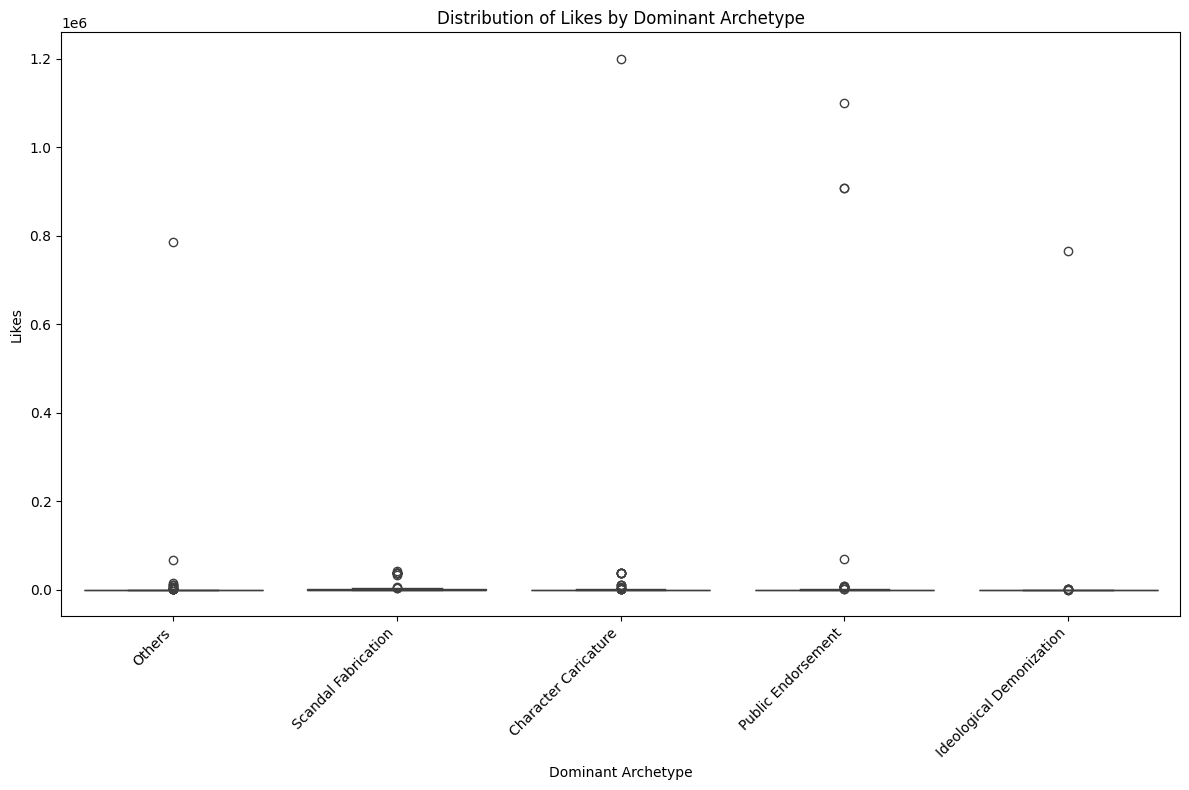

In [80]:
# Visualize the distribution of likes with respect to each Dominant_Archetype category

# Merge the cleaned engagement data with the archetype data
df_viz = pd.concat([df_arc, df_eng_cleaned], axis=1)
# Visualize the distribution of likes for each Dominant_Archetype
plt.figure(figsize=(12, 8))
sns.boxplot(x='Dominant_Archetype', y='likes', data=df_viz)
plt.title('Distribution of Likes by Dominant Archetype')
plt.xlabel('Dominant Archetype')
plt.ylabel('Likes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Quite some outliers?

In [68]:
def remove_outliers_iqr(group, col):
    Q1 = group[col].quantile(0.25)
    Q3 = group[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group[col] >= lower_bound) & (group[col] <= upper_bound)]

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Not removing outliers:

In [88]:
df_eng_cleaned_with_arc = df_eng_cleaned.merge(df_arc, left_index=True, right_index=True)

# Conduct regression analysis on Dominant_Archetype vs. engagement columns
# engagement_cols = ['likes', 'views', 'shares', 'comments']
engagement_cols = ['likes'] # Let's start with likes first

print("\nRegression Results:")

# Iterate through each engagement column
for eng_col in engagement_cols:
    print(f"\n--- Regression for '{eng_col}' ---")

    # Drop rows where the engagement metric or archetype is NaN
    df_subset = df_eng_cleaned_with_arc[[eng_col, 'Dominant_Archetype']].dropna()

    if df_subset.empty:
        print(f"No data available for regression on '{eng_col}' after dropping NaNs.")
        continue

    # Define the regression formula
    formula = f'{eng_col} ~ C(Dominant_Archetype, Treatment(reference="Others"))'

    try:
        # Fit the regression model
        model = smf.ols(formula=formula, data=df_subset)
        results = model.fit()

        # Print the summary of the regression results
        print(results.summary())

    except Exception as e:
        print(f"Could not perform regression for '{eng_col}'. Error: {e}")


Regression Results:

--- Regression for 'likes' ---
                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.332
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.257
Time:                        14:54:59   Log-Likelihood:                -6459.9
No. Observations:                 498   AIC:                         1.293e+04
Df Residuals:                     493   BIC:                         1.295e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------

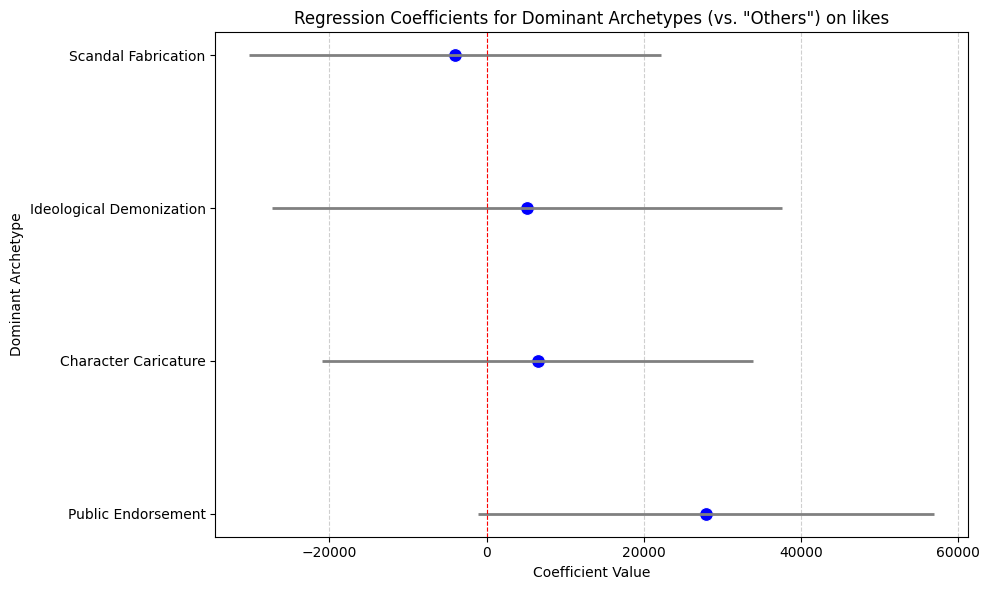

In [89]:
# Get all parameters except the intercept
coefs = results.params.drop('Intercept', errors='ignore')
conf_int = results.conf_int(alpha=0.05) # 95% confidence intervals
conf_int = conf_int.drop('Intercept', errors='ignore')


# Rename the index for better plotting labels
# Remove the statsmodels dummy variable encoding part
coefs.index = coefs.index.str.replace(r'C\(Dominant_Archetype, Treatment\(reference="Others"\)\)\[T\.', '', regex=True).str.replace(']', '', regex=False)
conf_int.index = conf_int.index.str.replace(r'C\(Dominant_Archetype, Treatment\(reference="Others"\)\)\[T\.', '', regex=True).str.replace(']', '', regex=False)


# Combine coefficients and confidence intervals into a single DataFrame for easier plotting
coef_df = pd.DataFrame({'Coefficient': coefs,
                        'Lower_CI': conf_int[0],
                        'Upper_CI': conf_int[1]})

# Sort by coefficient value for better visualization
coef_df = coef_df.sort_values(by='Coefficient')

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Coefficient', y=coef_df.index, data=coef_df, marker='o', s=100, color='blue')

# Add confidence intervals
for index, row in coef_df.iterrows():
    plt.hlines(y=index, xmin=row['Lower_CI'], xmax=row['Upper_CI'], color='gray', linewidth=2)

plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8) # Add a vertical line at 0 for reference
plt.title(f'Regression Coefficients for Dominant Archetypes (vs. "Others") on {eng_col}')
plt.xlabel('Coefficient Value')
plt.ylabel('Dominant Archetype')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Removing outliers:

In [90]:
df_eng_cleaned_with_arc = df_eng_cleaned.merge(df_arc, left_index=True, right_index=True)

# Conduct regression analysis on Dominant_Archetype vs. engagement columns
# engagement_cols = ['likes', 'views', 'shares', 'comments']
engagement_cols = ['likes'] # Let's start with likes first

print("\nRegression Results:")

# Iterate through each engagement column
for eng_col in engagement_cols:
    print(f"\n--- Regression for '{eng_col}' ---")

    # Drop rows where the engagement metric or archetype is NaN
    df_subset = df_eng_cleaned_with_arc[[eng_col, 'Dominant_Archetype']].dropna()
    df_subset = df_subset.groupby('Dominant_Archetype', group_keys=False).apply(remove_outliers_iqr, col=eng_col)

    if df_subset.empty:
        print(f"No data available for regression on '{eng_col}' after dropping NaNs.")
        continue

    # Define the regression formula
    formula = f'{eng_col} ~ C(Dominant_Archetype, Treatment(reference="Others"))'

    try:
        # Fit the regression model
        model = smf.ols(formula=formula, data=df_subset)
        results = model.fit()

        # Print the summary of the regression results
        print(results.summary())

    except Exception as e:
        print(f"Could not perform regression for '{eng_col}'. Error: {e}")


Regression Results:

--- Regression for 'likes' ---
                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     21.92
Date:                Sat, 24 May 2025   Prob (F-statistic):           1.90e-16
Time:                        14:55:11   Log-Likelihood:                -3254.1
No. Observations:                 425   AIC:                             6518.
Df Residuals:                     420   BIC:                             6538.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------

<ipython-input-90-31d01b6238f3>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_subset = df_subset.groupby('Dominant_Archetype', group_keys=False).apply(remove_outliers_iqr, col=eng_col)


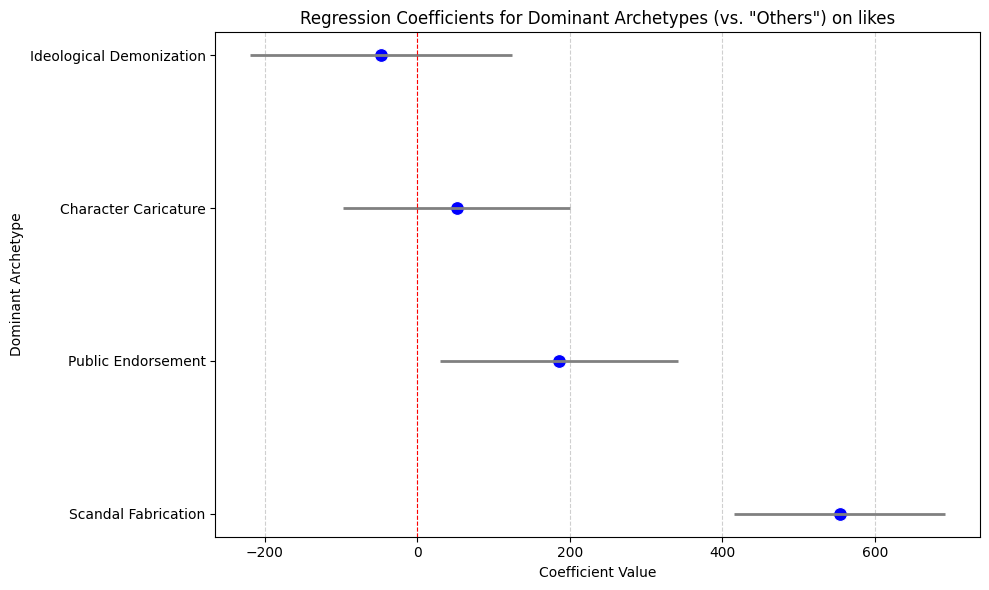

In [91]:
# Get all parameters except the intercept
coefs = results.params.drop('Intercept', errors='ignore')
conf_int = results.conf_int(alpha=0.05) # 95% confidence intervals
conf_int = conf_int.drop('Intercept', errors='ignore')

# Rename the index for better plotting labels
# Remove the statsmodels dummy variable encoding part
coefs.index = coefs.index.str.replace(r'C\(Dominant_Archetype, Treatment\(reference="Others"\)\)\[T\.', '', regex=True).str.replace(']', '', regex=False)
conf_int.index = conf_int.index.str.replace(r'C\(Dominant_Archetype, Treatment\(reference="Others"\)\)\[T\.', '', regex=True).str.replace(']', '', regex=False)


# Combine coefficients and confidence intervals into a single DataFrame for easier plotting
coef_df = pd.DataFrame({'Coefficient': coefs,
                        'Lower_CI': conf_int[0],
                        'Upper_CI': conf_int[1]})

# Sort by coefficient value for better visualization
coef_df = coef_df.sort_values(by='Coefficient')

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Coefficient', y=coef_df.index, data=coef_df, marker='o', s=100, color='blue')

# Add confidence intervals
for index, row in coef_df.iterrows():
    plt.hlines(y=index, xmin=row['Lower_CI'], xmax=row['Upper_CI'], color='gray', linewidth=2)

plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8) # Add a vertical line at 0 for reference
plt.title(f'Regression Coefficients for Dominant Archetypes (vs. "Others") on {eng_col}')
plt.xlabel('Coefficient Value')
plt.ylabel('Dominant Archetype')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Investigating the outliers:

In [96]:
# Create a copy for safe processing
df_outlier_checked = df_eng_cleaned_with_arc[['likes', 'Document', 'Dominant_Archetype']].dropna()

# Function to identify outliers using IQR within each category
def get_outliers_iqr(df, col, group_col):
    outlier_rows = []

    for group, group_df in df.groupby(group_col):
        Q1 = group_df[col].quantile(0.25)
        Q3 = group_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = group_df[(group_df[col] < lower_bound) | (group_df[col] > upper_bound)]
        if not outliers.empty:
            print(f"\nOutliers in group '{group}':")
            print(outliers[['likes', 'Document']])
            outlier_rows.append(outliers)

    if outlier_rows:
        return pd.concat(outlier_rows)
    else:
        print("No outliers found.")
        return pd.DataFrame(columns=df.columns)

# Detect and print outliers
outliers_df = get_outliers_iqr(df_outlier_checked, col='likes', group_col='Dominant_Archetype')


Outliers in group 'Character Caricature':
         likes                                           Document
21      5500.0  there is a large cloud of smoke next to a gove...
23     39000.0  president macron is running through the street...
24     39000.0  macron is near unruly crowds who are trying to...
25     39000.0  president macron is running through a cloud of...
26     38000.0  the deepfake image shows emmanuel macron the p...
38     39000.0  macron is running through a cloud of smoke awa...
39     39000.0  president macron is shielding himself behind r...
94      3100.0  the video is an ad from desantis war room that...
212  1200000.0  various important public figures are depicted ...
305     1400.0  donald trump and melania trump are posing with...
390     2200.0   kamala harris is depicted on a blue doritos bag 
391     2200.0  the image shows a bag of doritos with a photo ...
508    11000.0  mike pence is walking a pride parade wearing a...
509    11000.0  mike pence is wea